In [22]:
%matplotlib inline
import pandas as pd

In [23]:
data = pd.read_csv("train_nn.csv")

data = data.drop(labels = "Unnamed: 0", axis = 1)

In [24]:
results = pd.DataFrame(data.mean())

results.reset_index(inplace = True)

results.columns = ['Column', 'Mean']

results['rater'] = results['Column'].str[-1:]

results['category'] = results['Column'].str[0:-1]

results[['rater', 'category', 'Mean']].pivot(index = 'category', columns = 'rater').to_csv('pct_by_rater.csv')

In [25]:
labels = ['CAPS', 'Obscenity', 'Threat', 'hatespeech', 'namecalling', 'negprejudice', 'noneng', 'porn', 'stereotypes']

In [26]:
#calculate the percent of raters who gave it that label

for label in labels:
    cols = [label + str(x) for x in range(1,8)]
    data[label + '_pct'] = data[cols].sum(axis = 1)/(7 - data[cols].isnull().sum(axis = 1))

In [6]:
#calculate the number of raters who gave it that label

for label in labels:
    cols = [label + str(x) for x in range(1,8)]
    data[label + '_num_yes'] = data[cols].sum(axis = 1)
    data[label + '_num_raters'] = 7 - data[cols].isnull().sum(axis = 1)

In [28]:
label_pct = [label + '_pct' for label in labels]

In [29]:
data[label_pct].describe()

,CAPS_pct,Obscenity_pct,Threat_pct,hatespeech_pct,namecalling_pct,negprejudice_pct,noneng_pct,porn_pct,stereotypes_pct
count,5584.000000,5584.000000,5585.000000,5584.000000,5584.000000,5584.000000,5584.000000,5584.000000,5584.000000
mean,0.014446,0.054441,0.033721,0.032772,0.082423,0.142550,0.081528,0.010387,0.093675
std,0.100945,0.188191,0.132906,0.132772,0.208419,0.254525,0.268300,0.090642,0.206472
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.250000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [59]:
class_imbalance = data[labels[0]].value_counts()/data.shape[0]

for label in labels[1:len(labels)]:
    series = data[label].value_counts()/data.shape[0]
    class_imbalance = pd.concat([class_imbalance, series], axis = 1)

In [64]:
class_imbalance

,CAPS,Obscenity,Threat,hatespeech,namecalling,negprejudice,noneng,porn,stereotypes
0,0.985318,0.951835,0.97171,0.976007,0.927126,0.866607,0.917278,0.990868,0.920322
1,0.014682,0.048165,0.02829,0.023993,0.072874,0.133393,0.082722,0.009132,0.079678


In [65]:
class_imbalance.to_csv("class_imbalance.csv")

In [9]:
#46% of negative prejudice labels are corrobarated by another rater

sum(data['negprejudice_num_yes'] > 1)/sum(data['negprejudice_num_yes'] > 0)

0.45846153846153848

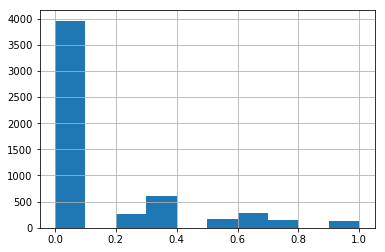

In [10]:
data['negprejudice'].hist()

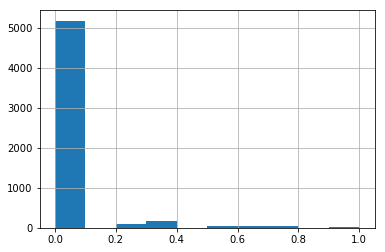

In [11]:
data['Threat'].hist()

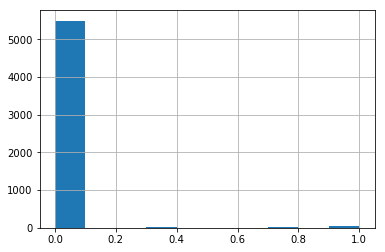

In [12]:
data['porn'].hist()

In [13]:
#38% of stereotype labels are corroborated by another rater

sum(data['stereotypes_num_yes'] > 1)/sum(data['stereotypes_num_yes'] > 0)

0.3793691389599318

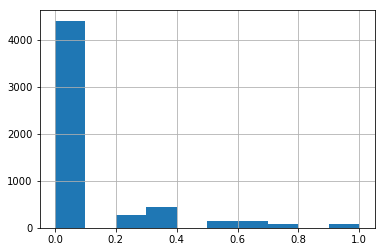

In [14]:
data['stereotypes'].hist()

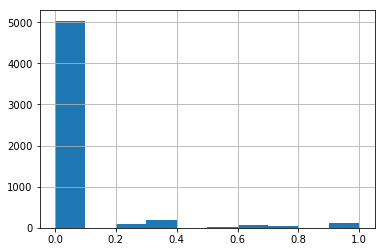

In [15]:
data['Obscenity'].hist()

In [16]:
#32% of hatespeech labels are corroborated by another rater

sum(data['hatespeech_num_yes'] > 1)/sum(data['hatespeech_num_yes'] > 0)

0.32289156626506021

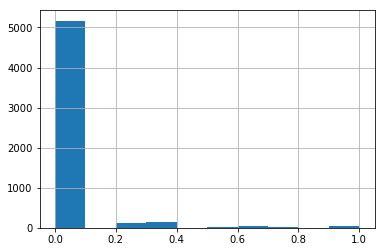

In [17]:
data['hatespeech'].hist()

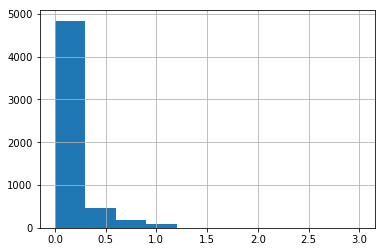

In [18]:
data['namecalling'].hist()